## Qn1

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Import data
path = r'C:\Users\Hiroshi\Documents\12-2023 Instacart Basket Analysis'
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', '02 Prepared Data', 'ords_prods_cust_merge_regcust.pkl'))

## Qn2

In [ ]:
#Remove PII data from dataframe
ords_prods_cust_merge.drop(columns = ['First Name','Surnam'],inplace=True)

## Qn3

In [ ]:
# Create a new region column
result = []
for value in ords_prods_cust_merge["STATE"]:
  if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
    result.append("Northeast")
  elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
    result.append("Midwest")
  elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
    result.append("South")
  elif value in ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']:
    result.append("West")

In [ ]:
ords_prods_cust_merge['Region'] = result

In [ ]:
# Transform data to plot grouped bar chart- Spending Habits Across Regions
low_spender = ords_prods_cust_merge.loc[ords_prods_cust_merge['spending_flag'] == 'Low spender']

In [ ]:
high_spender = ords_prods_cust_merge.loc[ords_prods_cust_merge['spending_flag'] == 'High spender']

In [ ]:
low_spender2 = low_spender.groupby('Region')['user_id'].nunique()

In [ ]:
high_spender2 = high_spender.groupby('Region')['user_id'].nunique()

In [ ]:
df_bar_chart = pd.concat([low_spender2,high_spender2],axis=1)

In [ ]:
df_bar_chart.reset_index(inplace=True)

In [ ]:
df_bar_chart.columns = ['Region','Low spender','High spender']

In [ ]:
# Plot grouped bar chart- Spending Habits Across Regions
spending_habits_bar = df_bar_chart.plot(x='Region', 
        kind='bar', 
        stacked=False, 
        title='Spending Habits Across Regions',
        ylabel='Number of customers') 
plt.xticks(rotation = 0)

In [ ]:
# Export the grouped bar chart
spending_habits_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_habits_bar.png'))

From the bar chart, we do not see a significant difference in spending habits between the different U.S. regions. The customers for all regions are mostly made up of low spenders. There is only a very small proportion of high spenders across all regions.

## Qn4

In [ ]:
# Create an exclusion flag for low-activity customers (customers with less than 5 orders).
low_act_flag = []

for value in ords_prods_cust_merge["max_order"]:
  if value < 5:
    low_act_flag.append("Low-activity customer")
  else:
    low_act_flag.append("Regular customer")

In [ ]:
ords_prods_cust_merge['low_act_flag'] = low_act_flag

In [ ]:
# Exclude low-activity customers from the data. 
ords_prods_cust_merge_regcust = ords_prods_cust_merge.loc[ords_prods_cust_merge['low_act_flag'] == 'Regular customer']

In [ ]:
# Export data
ords_prods_cust_merge_regcust.to_pickle(os.path.join(path, '02 Data','02 Prepared Data', 'ords_prods_cust_merge_regcust.pkl'))

## Qn5

In [ ]:
# Create column for age profile
age_profile = []

for value in ords_prods_cust_merge_regcust["Age"]:
  if (value >= 18) & (value <30):
    age_profile.append("Young adult(18-29)")
  elif (value >= 30) & (value <50):
    age_profile.append("Adult(30-49)")
  elif (value >= 50) & (value <65):
    age_profile.append("Older adult(50-64)")
  else:
    age_profile.append("Senior(65+)")

In [ ]:
ords_prods_cust_merge_regcust['age_profile'] = age_profile

In [ ]:
# Plot bar chart to show distribution for each age profile
age_prof_bar = ords_prods_cust_merge_regcust['Age profile'].value_counts().plot.bar()
plt.xticks(rotation = 30)
plt.xlabel('')
plt.ylabel('Total number of orders')
plt.title('Distribution of Orders Across Different Age Groups')
plt.tight_layout()

In [ ]:
# Export bar chart
age_prof_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_prof_bar.png'))

In [ ]:
# Create column for income profile
income_profile = []

for value in ords_prods_cust_merge_regcust["income"]:
  if value < 50000 :
    income_profile.append("Low income (less than 50k)")
  elif (value >= 50000) & (value <100000):
    income_profile.append("Middle income (50k-100k)")
  elif value >= 100000 :
    income_profile.append("High income (more than 100k)")

In [ ]:
ords_prods_cust_merge_regcust['income_profile'] = income_profile

In [ ]:
# Plot bar chart to show distribution for each income profile
income_prof_bar = ords_prods_cust_merge_regcust['income_profile'].value_counts().plot.bar()
plt.xticks(rotation = 10)
plt.xlabel('')
plt.ylabel('Total number of orders')
plt.title('Distribution of Orders Across Different Income Levels')
plt.tight_layout()

In [ ]:
# Export bar chart
income_prof_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_prof_bar.png'))

In [ ]:
# Create column for family status profile
#High income
ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['married','divorced/widowed','single'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'High income (more than 100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Young adult(18-29)','Adult(30-49)'])) & (ords_prods_cust_merge_regcust['n_dependants'] > 0), 'fam_profile'] = 'High income adults with dependents not living with parents'
ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['married','divorced/widowed','single'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'High income (more than 100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Young adult(18-29)','Adult(30-49)'])) & (ords_prods_cust_merge_regcust['n_dependants'] == 0), 'fam_profile'] = 'High income adults w/o dependents not living with parents'

ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['married','divorced/widowed','single'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'High income (more than 100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Older adult(50-64)','Senior(65+)'])) & (ords_prods_cust_merge_regcust['n_dependants'] > 0), 'fam_profile'] = 'High income older adults/seniors with dependents not living with parents'
ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['married','divorced/widowed','single'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'High income (more than 100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Older adult(50-64)','Senior(65+)'])) & (ords_prods_cust_merge_regcust['n_dependants'] == 0), 'fam_profile'] = 'High income older adults/seniors w/o dependents not living with parents'

ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['living with parents and siblings'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'High income (more than 100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Young adult(18-29)','Adult(30-49)'])) & (ords_prods_cust_merge_regcust['n_dependants'] > 0), 'fam_profile'] = 'High income adults with dependents living with parents'
ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['living with parents and siblings'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'High income (more than 100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Young adult(18-29)','Adult(30-49)'])) & (ords_prods_cust_merge_regcust['n_dependants'] == 0), 'fam_profile'] = 'High income adults w/o dependents living with parents'

ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['living with parents and siblings'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'High income (more than 100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Older adult(50-64)','Senior(65+)'])) & (ords_prods_cust_merge_regcust['n_dependants'] > 0), 'fam_profile'] = 'High income older adults/seniors with dependents living with parents'
ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['living with parents and siblings'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'High income (more than 100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Older adult(50-64)','Senior(65+)'])) & (ords_prods_cust_merge_regcust['n_dependants'] == 0), 'fam_profile'] = 'High income older adults/seniors w/o dependents living with parents'

#Middle income
ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['married','divorced/widowed','single'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Middle income (50k-100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Young adult(18-29)','Adult(30-49)'])) & (ords_prods_cust_merge_regcust['n_dependants'] > 0), 'fam_profile'] = 'Middle income adults with dependents not living with parents'
ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['married','divorced/widowed','single'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Middle income (50k-100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Young adult(18-29)','Adult(30-49)'])) & (ords_prods_cust_merge_regcust['n_dependants'] == 0), 'fam_profile'] = 'Middle income adults w/o dependents not living with parents'

ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['married','divorced/widowed','single'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Middle income (50k-100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Older adult(50-64)','Senior(65+)'])) & (ords_prods_cust_merge_regcust['n_dependants'] > 0), 'fam_profile'] = 'Middle income older adults/seniors with dependents not living with parents'
ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['married','divorced/widowed','single'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Middle income (50k-100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Older adult(50-64)','Senior(65+)'])) & (ords_prods_cust_merge_regcust['n_dependants'] == 0), 'fam_profile'] = 'Middle income older adults/seniors w/o dependents not living with parents'

ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['living with parents and siblings'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Middle income (50k-100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Young adult(18-29)','Adult(30-49)'])) & (ords_prods_cust_merge_regcust['n_dependants'] > 0), 'fam_profile'] = 'Middle income adults with dependents living with parents'
ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['living with parents and siblings'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Middle income (50k-100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Young adult(18-29)','Adult(30-49)'])) & (ords_prods_cust_merge_regcust['n_dependants'] == 0), 'fam_profile'] = 'Middle income adults w/o dependents living with parents'

ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['living with parents and siblings'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Middle income (50k-100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Older adult(50-64)','Senior(65+)'])) & (ords_prods_cust_merge_regcust['n_dependants'] > 0), 'fam_profile'] = 'Middle income older adults/seniors with dependents living with parents'
ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['living with parents and siblings'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Middle income (50k-100k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Older adult(50-64)','Senior(65+)'])) & (ords_prods_cust_merge_regcust['n_dependants'] == 0), 'fam_profile'] = 'Middle income older adults/seniors w/o dependents living with parents'

#Low income
ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['married','divorced/widowed','single'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Low income (less than 50k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Young adult(18-29)','Adult(30-49)'])) & (ords_prods_cust_merge_regcust['n_dependants'] > 0), 'fam_profile'] = 'Low income adults with dependents not living with parents'
ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['married','divorced/widowed','single'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Low income (less than 50k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Young adult(18-29)','Adult(30-49)'])) & (ords_prods_cust_merge_regcust['n_dependants'] == 0), 'fam_profile'] = 'Low income adults w/o dependents not living with parents'

ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['married','divorced/widowed','single'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Low income (less than 50k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Older adult(50-64)','Senior(65+)'])) & (ords_prods_cust_merge_regcust['n_dependants'] > 0), 'fam_profile'] = 'Low income older adults/seniors with dependents not living with parents'
ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['married','divorced/widowed','single'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Low income (less than 50k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Older adult(50-64)','Senior(65+)'])) & (ords_prods_cust_merge_regcust['n_dependants'] == 0), 'fam_profile'] = 'Low income older adults/seniors w/o dependents not living with parents'

ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['living with parents and siblings'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Low income (less than 50k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Young adult(18-29)','Adult(30-49)'])) & (ords_prods_cust_merge_regcust['n_dependants'] > 0), 'fam_profile'] = 'Low income adults with dependents living with parents'
ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['living with parents and siblings'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Low income (less than 50k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Young adult(18-29)','Adult(30-49)'])) & (ords_prods_cust_merge_regcust['n_dependants'] == 0), 'fam_profile'] = 'Low income adults w/o dependents living with parents'

ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['living with parents and siblings'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Low income (less than 50k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Older adult(50-64)','Senior(65+)'])) & (ords_prods_cust_merge_regcust['n_dependants'] > 0), 'fam_profile'] = 'Low income older adults/seniors with dependents living with parents'
ords_prods_cust_merge_regcust.loc[(ords_prods_cust_merge_regcust['fam_status'].isin(['living with parents and siblings'])) &  (ords_prods_cust_merge_regcust['income_profile'] == 'Low income (less than 50k)') & (ords_prods_cust_merge_regcust['age_profile'].isin(['Older adult(50-64)','Senior(65+)'])) & (ords_prods_cust_merge_regcust['n_dependants'] == 0), 'fam_profile'] = 'Low income older adults/seniors w/o dependents living with parents'

In [ ]:
ords_prods_cust_merge_regcust['fam_profile'].value_counts()

In [ ]:
# Aggregate the max, mean, and min for expenditure
ords_prods_cust_merge_regcust.groupby(['income_profile','age_profile','fam_prof',]).agg({'prices': ['mean', 'min', 'max']})

In [ ]:
# Aggregate the max, mean, and min for expenditure by customer profile
agg_by_prof = ords_prods_cust_merge_regcust.groupby(['fam_profile']).agg({'prices': ['mean', 'min', 'max']})

In [ ]:
agg_by_prof.columns = agg_by_prof.columns.droplevel(0)

In [ ]:
#Copy aggregated data to clipboard
agg_by_prof.sort_values(by='mean',ascending=False).to_clipboard()

In [ ]:
# Aggregate the max, mean, and min for usage frequency
ords_prods_cust_merge_regcust.groupby(['income_profile','fam_prof','age_profile']).agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [ ]:
# Aggregate the max, mean, and min for expenditure by customer profile
agg_by_prof = ords_prods_cust_merge_regcust.groupby(['fam_profile']).agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [ ]:
agg_by_prof.columns = agg_by_prof.columns.droplevel(0)

In [ ]:
#Copy aggregated data to clipboard
agg_by_prof.sort_values(by='mean',ascending=True).to_clipboard()

In [16]:
# Transform data to plot chart by region
midwest = ords_prods_cust_merge_regcust.loc[ords_prods_cust_merge_regcust['Region'] == 'Midwest']

In [17]:
northeast = ords_prods_cust_merge_regcust.loc[ords_prods_cust_merge_regcust['Region'] == 'Northeast']

In [18]:
south = ords_prods_cust_merge_regcust.loc[ords_prods_cust_merge_regcust['Region'] == 'South']

In [19]:
west = ords_prods_cust_merge_regcust.loc[ords_prods_cust_merge_regcust['Region'] == 'West']

In [20]:
midwest_exp = midwest.groupby('fam_profile')['prices'].sum()
northeast_exp = northeast.groupby('fam_profile')['prices'].sum()
south_exp = south.groupby('fam_profile')['prices'].sum()
west_exp = west.groupby('fam_profile')['prices'].sum()

In [21]:
fam_exp_region_hbar = pd.concat([midwest_exp,northeast_exp,south_exp,west_exp],axis=1)
fam_exp_region_hbar.reset_index(inplace=True)

In [22]:
fam_exp_region_hbar.columns = ['Customer profile','Midwest','Northeast','South','West']

In [23]:
fam_exp_region_hbar.set_index('Customer profile', inplace = True)

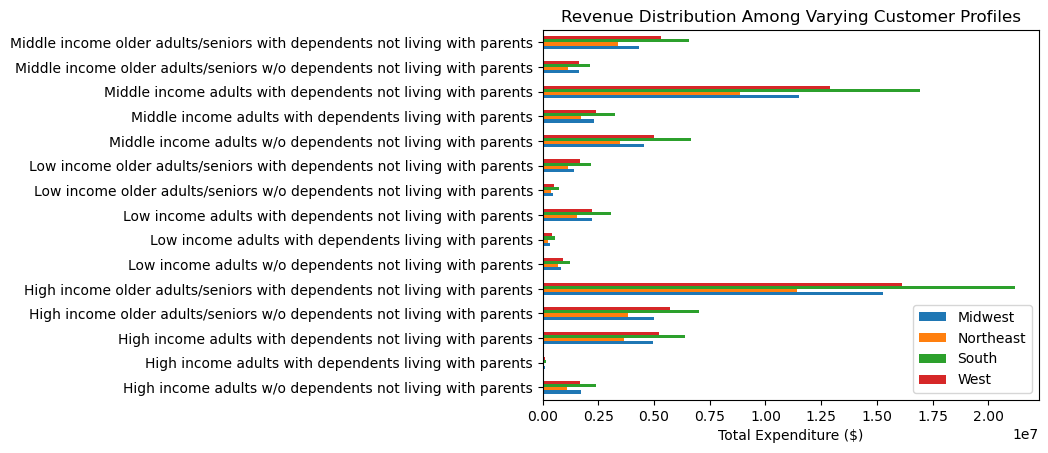

In [24]:
# Plot grouped horizontal bar- Revenue Distribution Among Different Regions
fam_exp_region_hbar = fam_exp_region_hbar.plot.barh()
plt.ylabel('')
plt.xlabel('Total Expenditure ($)')
plt.title('Revenue Distribution Among Different Regions')
plt.show()

In [6]:
# Transform data to plot chart by department
produce = ords_prods_cust_merge_regcust.loc[ords_prods_cust_merge_regcust['department'] == 'produce']

In [8]:
dairy_eggs = ords_prods_cust_merge_regcust.loc[ords_prods_cust_merge_regcust['department'] == 'dairy eggs']

In [9]:
snacks = ords_prods_cust_merge_regcust.loc[ords_prods_cust_merge_regcust['department'] == 'snacks']

In [10]:
beverages = ords_prods_cust_merge_regcust.loc[ords_prods_cust_merge_regcust['department'] == 'beverages']

In [11]:
produce_rev = produce.groupby('fam_profile')['prices'].sum()
dairyeggs_rev = dairy_eggs.groupby('fam_profile')['prices'].sum()
snacks_rev = snacks.groupby('fam_profile')['prices'].sum()
beverages_rev = beverages.groupby('fam_profile')['prices'].sum()

In [12]:
fam_rev_dpt_hbar = pd.concat([produce_rev,dairyeggs_rev,snacks_rev,beverages_rev],axis=1)
fam_rev_dpt_hbar.reset_index(inplace=True)

In [13]:
fam_rev_dpt_hbar.columns = ['Customer profile','Produce','Dairy eggs','Snacks','Beverages']

In [14]:
fam_rev_dpt_hbar.set_index('Customer profile', inplace = True)

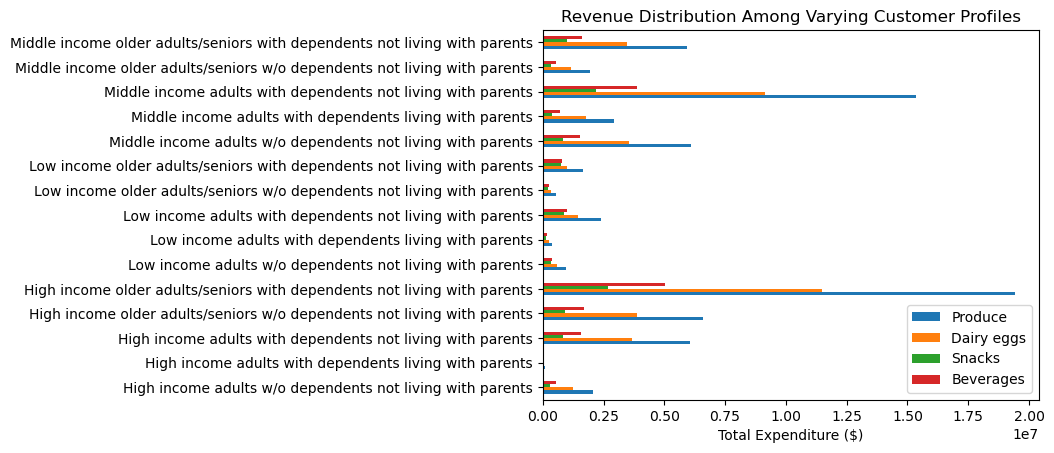

In [15]:
# Plot grouped horizontal bar- Revenue Distribution Among Varying Customer Profiles
fam_rev_dpt_hbar = fam_rev_dpt_hbar.plot.barh()
plt.ylabel('')
plt.xlabel('Total Expenditure ($)')
plt.title('Revenue Distribution Among Varying Customer Profiles')
plt.show()

## Create other graphs for final report

#### Distribution of orders across different departments

In [ ]:
# Import department data
df_department = pd.read_csv(os.path.join(path, '02 Data', '02 Prepared Data', 'department_wrangled2.csv'))

In [ ]:
# Merge deparment data
df_all2 = df_all.merge(df_department, on = 'department_id', how = 'left')

In [ ]:
# Create variable for order count per department
value_counts = df_all['department'].value_counts()
value_counts_sorted = value_counts.sort_values(ascending=True,inplace=True)

In [ ]:
# Export data
df_all2.to_pickle(os.path.join(path, '02 Data','02 Prepared Data', 'df_all.pkl'))

In [ ]:
# Create a horizontal bar chart
dpt_hbar = plt.barh(value_counts.index, value_counts.values)

# Set the title and labels
plt.xlabel('Number of orders')
plt.ylabel('Department')
plt.title('Distribution of Orders Across Different Department')
plt.tight_layout()

# Show the plot
plt.show()

#### Trend of revenue per hour throughout a day 

In [ ]:
# Aggregate total revenue per hour
rev_per_hr = ords_prods_cust_merge_regcust.groupby('order_hour_of_day')['prices'].sum()

In [ ]:
df_rev_per_hr = pd.DataFrame(rev_per_hr)
df_rev_per_hr.reset_index()

In [ ]:
# Plot line chart
rev_per_hr_line = sns.lineplot(data = df_rev_per_hr, x = 'order_hour_of_day', y = 'prices').set(title='Total Revenue At Different Times Of The Day')
plt.xlabel('Time of day')
plt.ylabel('Total revenue')
plt.tight_layout()

#### Identify what type of products people purchase the most at the time of the day when people spend the most money

In [ ]:
df_all.columns

In [ ]:
# Filter data to keep only orders at 12pm
df_all_peak = df_all2.loc[df_all2['order_hour_of_day'].isin([10,11,12,13,14,15,16])]

In [ ]:
# Get order count per department
dpt_order_ct_peak = df_all_peak['department'].value_counts()
dpt_order_ct_peak.sort_values(ascending=True,inplace=True)

In [ ]:
# Create a horizontal bar chart
dpt_order_ct_peak_hbar = plt.barh(dpt_order_ct_peak.index, dpt_order_ct_peak.values)

# Set the title and labels
plt.xlabel('Number of orders')
plt.ylabel('Department')
plt.title('Distribution of Orders Across Different Department At The Busiest Time')
plt.tight_layout()

# Show the plot
plt.show()

#### Identify what type of products people purchase the most for each price range

In [9]:
# Segregate data into each price range
df_higher_prange = df_exl_missing_price.loc[df_exl_missing_price['price_range_loc'].isin(['Higher-range product'])]

In [10]:
df_lower_prange = df_exl_missing_price.loc[df_exl_missing_price['price_range_loc'].isin(['Lower-range product'])]

In [11]:
dpt_order_ct_higher_prange = df_higher_prange['department'].value_counts()
dpt_order_ct_higher_prange.sort_values(ascending=True,inplace=True)

In [12]:
dpt_order_ct_lower_prange = df_lower_prange['department'].value_counts()
dpt_order_ct_lower_prange.sort_values(ascending=True,inplace=True)

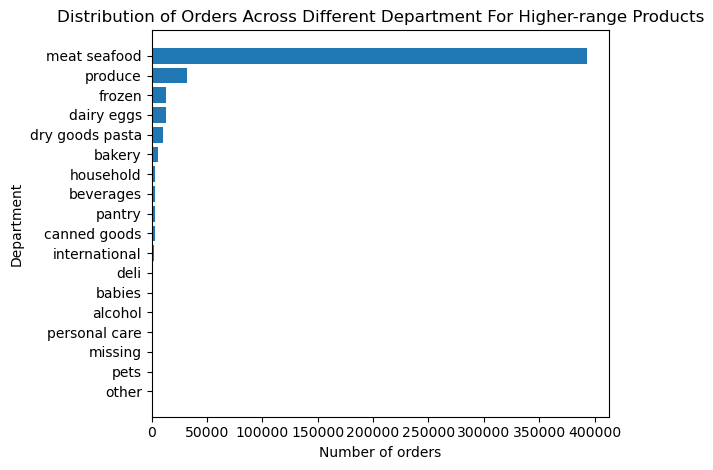

In [13]:
# Create a horizontal bar chart for higher-range product
dpt_order_ct_higher_prange_hbar = plt.barh(dpt_order_ct_higher_prange.index, dpt_order_ct_higher_prange.values)

# Set the title and labels
plt.xlabel('Number of orders')
plt.ylabel('Department')
plt.title('Distribution of Orders Across Different Department For Higher-range Products')
plt.tight_layout()

# Show the plot
plt.show()

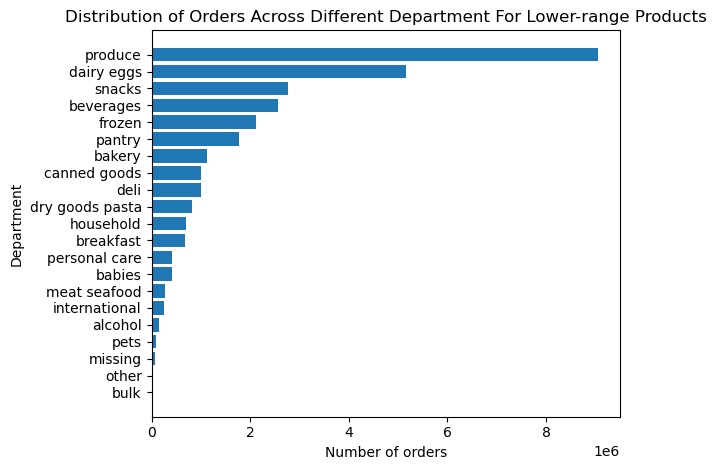

In [14]:
# Create a horizontal bar chart for higher-range product
dpt_order_ct_lower_prange_hbar = plt.barh(dpt_order_ct_lower_prange.index, dpt_order_ct_lower_prange.values)

# Set the title and labels
plt.xlabel('Number of orders')
plt.ylabel('Department')
plt.title('Distribution of Orders Across Different Department For Lower-range Products')
plt.tight_layout()

# Show the plot
plt.show()

#### Identify the busiest days of the week

In [ ]:
# Plot histogram to identify most busy days of the week
order_dow_hist = ords_prods_cust_merge_regcust['order_dow'].plot.hist(bins = 7)
plt.xlabel('')
plt.ylabel('Total number of orders')
plt.xticks(np.arange(0, 7, 1), labels=['Sat','Sun','Mon','Tue','Wed','Thu','Fri']) 
plt.title('Distribution of Orders Throughout Different Days of The Week')
plt.tight_layout()

In [ ]:
# Export histogram
order_dow_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_dow_hist.png'))

#### Plot histogram for age

In [23]:
df_age = ords_prods_cust_merge[['user_id','Age']]

In [24]:
df_age.drop_duplicates()

,user_id,Age
0,1,31
59,2,68
254,3,33
342,4,31
360,7,39
...,...,...
30992056,206203,81
30992175,206206,25
30992460,206207,76
30992683,206208,64


Text(0.5, 1.0, 'Age Distribution of All Customers')

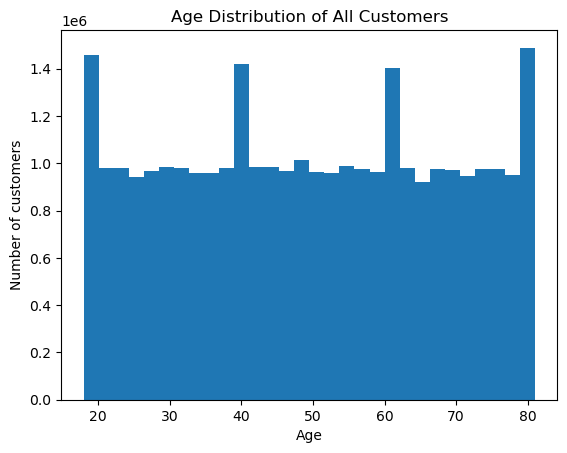

In [25]:
hist = df_age['Age'].plot.hist(bins = 30)
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.title('Age Distribution of All Customers')

#### Plot histogram for income

In [26]:
df_income = ords_prods_cust_merge[['user_id','income']]

In [28]:
df_income.drop_duplicates()

,user_id,income
0,1,40423
59,2,64940
254,3,93240
342,4,45435
360,7,89095
...,...,...
30992056,206203,106730
30992175,206206,75041
30992460,206207,110135
30992683,206208,156838


Text(0.5, 1.0, 'Income Distribution of All Customers')

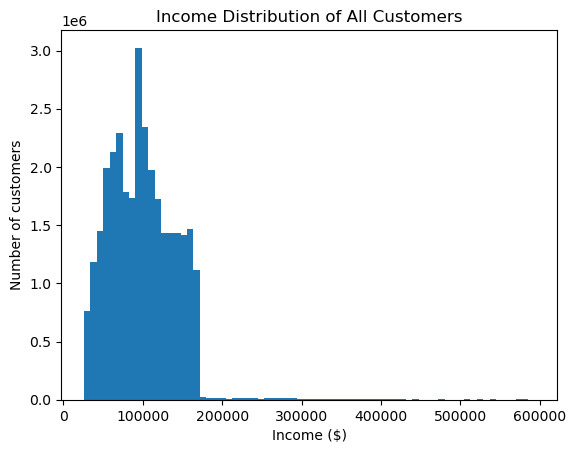

In [33]:
hist = df_income['income'].plot.hist(bins = 70)
plt.xlabel('Income ($)')
plt.ylabel('Number of customers')
plt.title('Income Distribution of All Customers')

#### Plot histogram for order count 

In [26]:
df_max_order = ords_prods_cust_merge[['user_id','max_order']]

In [27]:
df_max_order.drop_duplicates()

,user_id,max_order
0,1,10
59,2,14
254,3,12
342,4,5
360,7,20
...,...,...
30992056,206203,5
30992175,206206,67
30992460,206207,16
30992683,206208,49


Text(0.5, 1.0, 'Order Count Distribution of All Customers')

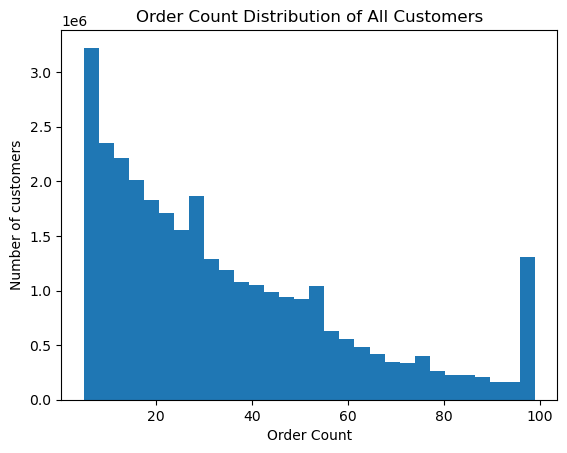

In [29]:
hist = df_max_order['max_order'].plot.hist(bins = 30)
plt.xlabel('Order Count')
plt.ylabel('Number of customers')
plt.title('Order Count Distribution of All Customers')

In [10]:
ords_prods_cust_merge.drop(columns = 'loyalty_flag', inplace=True)

In [11]:
# Create loyalty flag according to the number of order 
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] > 55, 'loyalty_flag'] = 'Loyal customer'
ords_prods_cust_merge.loc[(ords_prods_cust_merge['max_order'] <= 55) & (ords_prods_cust_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

C:\Users\Hiroshi\AppData\Local\Temp\ipykernel_16992\4169011035.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Loyal customer' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] > 55, 'loyalty_flag'] = 'Loyal customer'


#### Distribution of users in regards to their brand loyalty

In [12]:
# Get customer count per loyalty flag category
user_dist_loyalty = ords_prods_cust_merge.groupby('loyalty_flag')['user_id'].nunique()

In [13]:
# Data wrangling in preparation for plot
user_dist_loyalty.reset_index()
user_dist_loyalty.columns = ['Customer Loyalty','Number of customers']
user_dist_loyalty.sort_values(ascending=False,inplace=True)

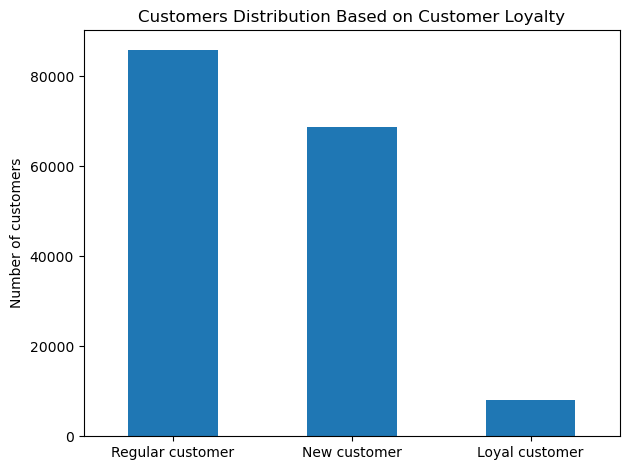

In [14]:
# Plot bar chart
cust_loyalty_bar = user_dist_loyalty.plot(x='Customer Loyalty', 
        kind='bar', 
        stacked=False, 
        title='Customers Distribution Based on Customer Loyalty',
        ylabel='Number of customers') 
plt.xticks(rotation = 0)
plt.xlabel('')
plt.tight_layout()

#### Plot grouped bar chart to compare ordering habits between customers of different spending habit

In [15]:
# Transform data to plot chart
low_spender = ords_prods_cust_merge.loc[ords_prods_cust_merge['spending_flag'] == 'Low spender']

In [16]:
high_spender = ords_prods_cust_merge.loc[ords_prods_cust_merge['spending_flag'] == 'High spender']

In [17]:
low_spender2 = low_spender.groupby('loyalty_flag')['user_id'].nunique()

In [18]:
high_spender2 = high_spender.groupby('loyalty_flag')['user_id'].nunique()

In [19]:
loyalty_spd_habit_hbar = pd.concat([low_spender2,high_spender2],axis=1)
loyalty_spd_habit_hbar.reset_index(inplace=True)

In [20]:
loyalty_spd_habit_hbar.columns = ['Loyalty status','Low spender','High spender']

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

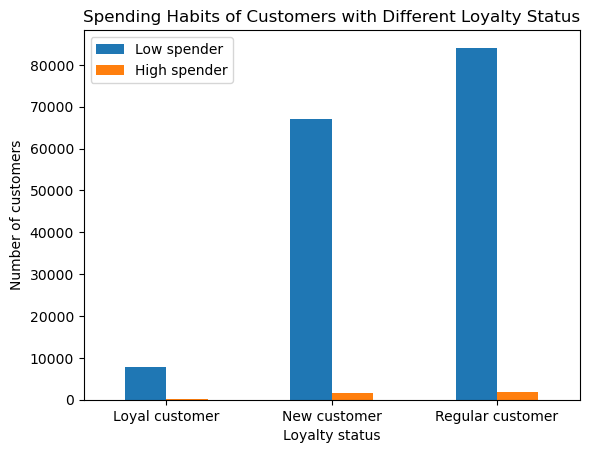

In [21]:
# Plot bar chart Comparison Of Customers With Varying spending habit
loyalty_spd_habit_hbar = loyalty_spd_habit_hbar.plot(x='Loyalty status', 
        kind='bar', 
        stacked=False, 
        title='Spending Habits of Customers with Different Loyalty Status',
        ylabel='Number of customers') 
plt.xticks(rotation = 0)

In [ ]:
# Export the grouped bar chart
loyalty_spd_habit_hbar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spd_habit_hbar.png'))

#### Plot grouped bar chart to compare ordering habits between customers of different age group

In [ ]:
# Transform data to plot chart
low_spender_age = low_spender.groupby('age_profile')['user_id'].nunique()

In [ ]:
high_spender_age = high_spender.groupby('age_profile')['user_id'].nunique()

In [ ]:
age_spd_habit_hbar = pd.concat([low_spender_age,high_spender_age],axis=1)
age_spd_habit_hbar.reset_index(inplace=True)

In [ ]:
age_spd_habit_hbar.columns = ['Age profile','Low spender','High spender']

In [ ]:
# Plot bar chart Comparison Of Customers With Varying Loyalty Status
age_spd_habit_hbar = age_spd_habit_hbar.plot(x='Age profile', 
        kind='bar', 
        stacked=False, 
        title='Spending Habits of Customers Across Different Age Group',
        ylabel='Number of customers',
        xlabel='') 
plt.xticks(rotation = 0)

In [ ]:
# Export the grouped bar chart
age_spd_habit_hbar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_spd_habit_hbar.png'))

#### Plot grouped horizontal bar chart to compare ordering habits between customers of different family status

In [ ]:
# Transform data to plot chart
low_spender_fam = low_spender.groupby('fam_status')['user_id'].nunique()

In [ ]:
high_spender_fam = high_spender.groupby('fam_status')['user_id'].nunique()

In [ ]:
fam_spd_habit_hbar = pd.concat([low_spender_fam,high_spender_fam],axis=1)
fam_spd_habit_hbar.reset_index(inplace=True)

In [ ]:
fam_spd_habit_hbar.columns = ['Family status','Low spender','High spender']

In [ ]:
fam_spd_habit_hbar.set_index('Family status', inplace = True)

In [ ]:
fam_spd_habit_hbar = fam_spd_habit_bar.plot.barh()
plt.ylabel('')
plt.xlabel('Number of customers')
plt.title('Spending Habits of Customers With Varying Family Status')
plt.tight_layout()
plt.show()

#### Create price groupings for marketing and sales strategy 

In [ ]:
# Plot histogram to see price distribution
prices_hist = ords_prods_cust_merge_regcust['prices'].plot.hist(bins = 25)
plt.xlabel('Price')
plt.ylabel('Total number of orders')
plt.title('Price Distribution Of All Orders')
plt.tight_layout()

In [ ]:
# Export histogram
prices_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_hist.png'))

In [6]:
df_exl_missing_price = ords_prods_cust_merge.dropna(subset = ['price_range_loc'])

In [7]:
df_exl_missing_price['price_range_loc'].value_counts()

price_range_loc
Lower-range product     30473625
Higher-range product      486068
Name: count, dtype: int64

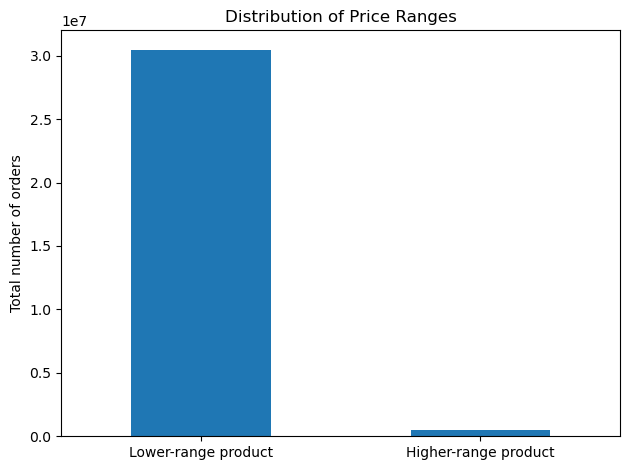

In [8]:
# Plot price range distribution bar chart

price_range_bar = df_exl_missing_price['price_range_loc'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.xlabel('')
plt.ylabel('Total number of orders')
plt.title('Distribution of Price Ranges')
plt.tight_layout()

In [ ]:
# Export bar chart
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_bar2.png'))